## Liver Disease Prediction 

### Content 

In [1]:
# For numerical computing 
import numpy as np 

# for dataframe 
import pandas as pd 

# for easier visualization 
import seaborn as sns 

# for visualization and display plots 
import matplotlib.pyplot as plt 

# Ignore warnings 
import warnings
warnings.filterwarnings('ignore')

import math

# to split train and test set 
from sklearn.model_selection import train_test_split 

# to perform hyperparameter tunning 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV 

from sklearn.model_selection import cross_val_score 

# machine learning Models 
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score,confusion_matrix

from sklearn.preprocessing import StandardScaler 


In [2]:
# Importing the datasets 
df = pd.read_csv('indian_liver_patient.csv')
df 

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [3]:
# First 5 records 
df.head() 

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
# Shape of the dataset 
df.shape 

(583, 11)

In [5]:
df.columns 

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [6]:
df.describe() 

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


### Exploratory Data Analysis 

#### Filtering categorical data 

In [7]:
df.dtypes[df.dtypes=='object']

Gender    object
dtype: object

#### Distribution of Numerical features 

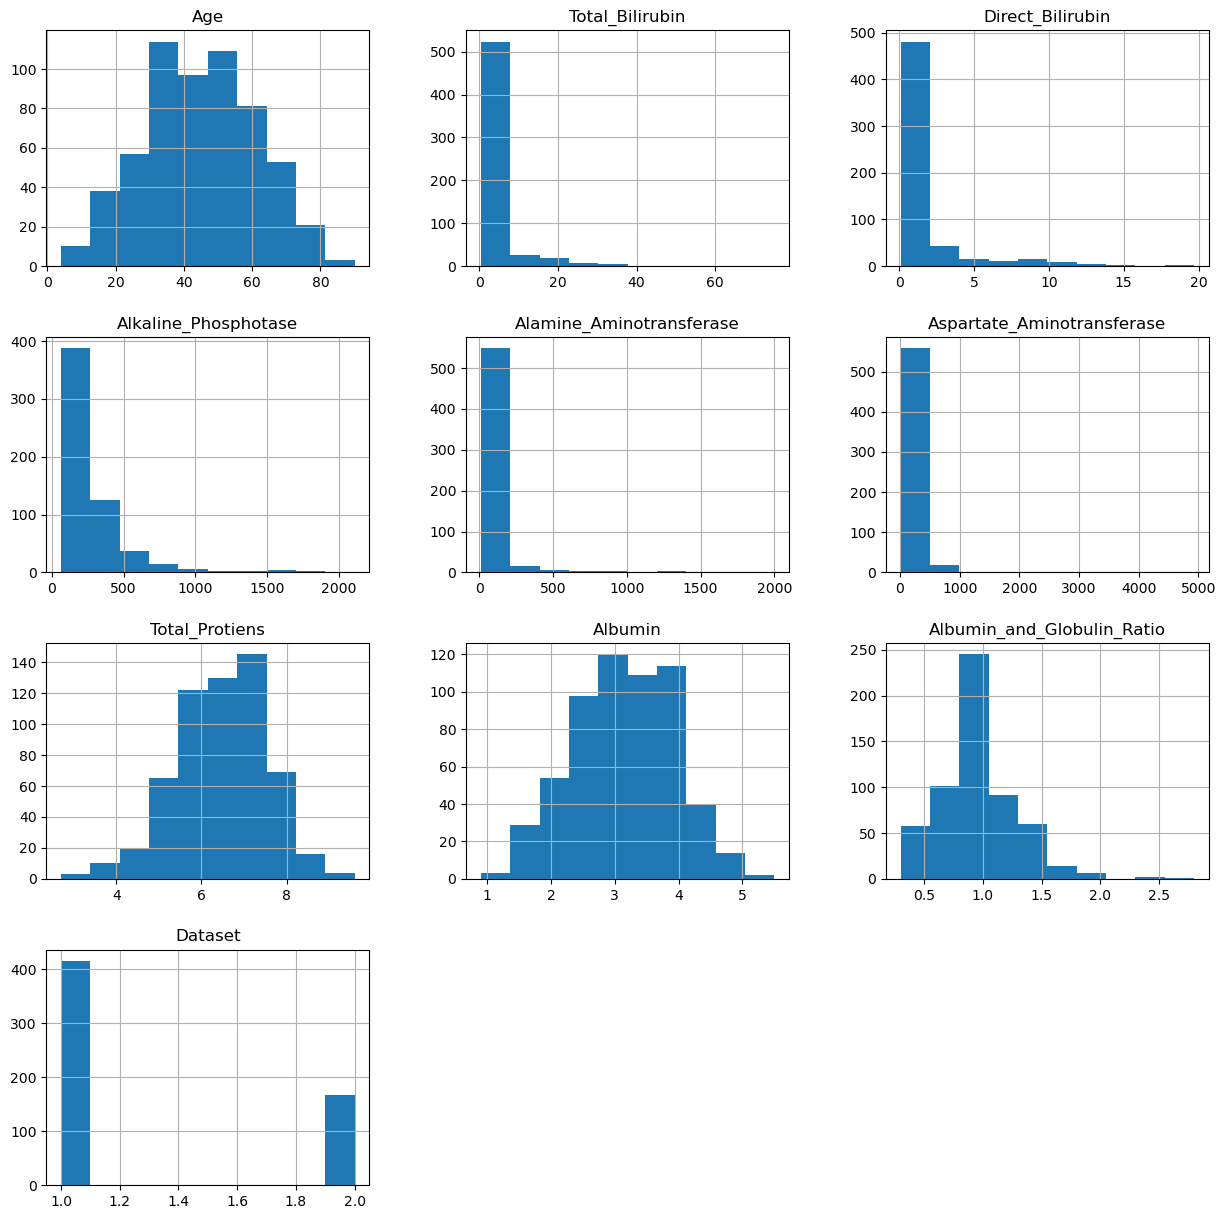

In [8]:
# plot histogram grid 
df.hist(figsize=(15,15))
plt.show() 

In [9]:
df.describe() 

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [10]:
## if score score==negative, mark 0 ; else 1 
def partition(x):
    if x==2:
        return 0 
    return 1
df['Dataset'] = df['Dataset'].map(partition) 

### Distribution of Categorical data  

In [11]:
df.describe(include=['object'])

,Gender
count,583
unique,2
top,Male
freq,441


### Bar plots for categorical Features : 

<Axes: xlabel='count', ylabel='Gender'>

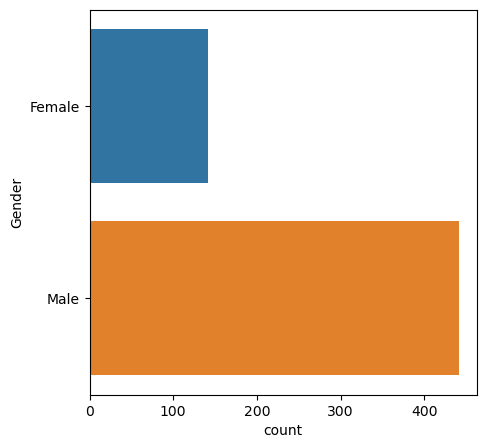

In [12]:
plt.figure(figsize=(5,5))
sns.countplot(y='Gender',data=df)

In [13]:
df[df['Gender'] == 'Male'][['Dataset','Gender']].head() 

,Dataset,Gender
1,1,Male
2,1,Male
3,1,Male
4,1,Male
5,1,Male


Number of patients that are male: 441
Number of patients that are female: 142


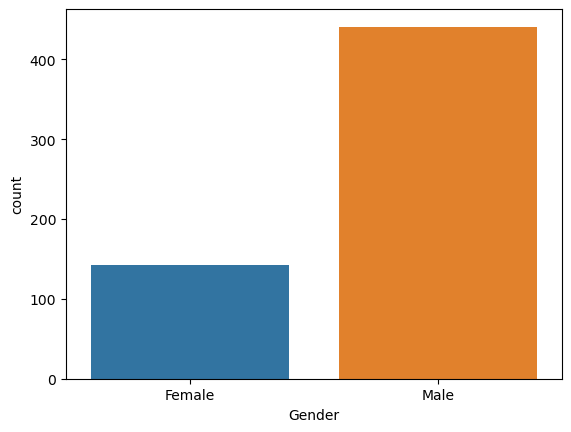

In [14]:
sns.countplot(data=df,x='Gender',label='Count')

M,F = df['Gender'].value_counts() 
print('Number of patients that are male:',M)
print('Number of patients that are female:',F) 

In [15]:
## if score==negative , mark 0 ; else 1 

def partition(x):
    if x=='Male':
        return 0 
    return 1 

df['Gender'] = df['Gender'].map(partition) 

### 2-D Scatter plot :

<Axes: xlabel='Total_Bilirubin', ylabel='Direct_Bilirubin'>

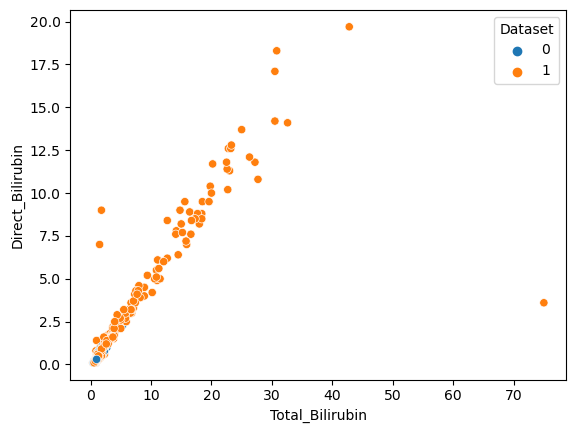

In [16]:

sns.scatterplot(x = df['Total_Bilirubin'],y = df['Direct_Bilirubin'],hue=df['Dataset'])

<Axes: xlabel='Total_Bilirubin', ylabel='Albumin'>

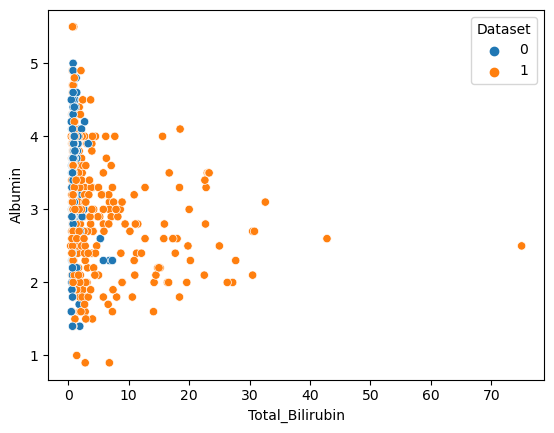

In [17]:
sns.scatterplot(x=df['Total_Bilirubin'],y=df['Albumin'],hue=df['Dataset'])

<Axes: xlabel='Total_Protiens', ylabel='Albumin_and_Globulin_Ratio'>

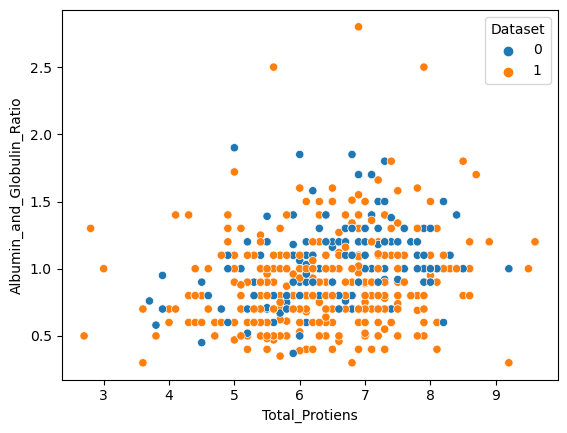

In [18]:
sns.scatterplot(x=df['Total_Protiens'],y=df['Albumin_and_Globulin_Ratio'],hue=df['Dataset'])

### Duplicated values 

In [19]:
df.duplicated().sum() 

13

In [20]:
df = df.drop_duplicates()
print(df.shape) 

(570, 11)


### Missing values imputation 

In [21]:
df.isna().sum() 

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

<Axes: >

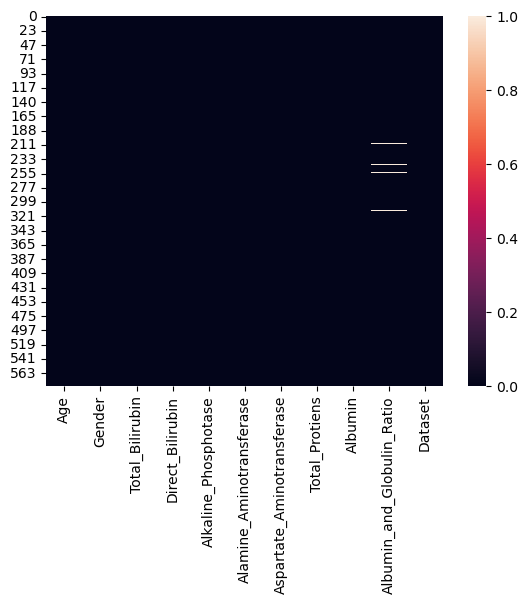

In [22]:
# White line indicates the missing values 
sns.heatmap(df.isna()) 

In [23]:
# % of missing values :- 
for i in df.isna().sum():
    print((i/len(df)*100))

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.7017543859649122
0.0


In [24]:
df.dropna(inplace=True) 

In [25]:
df.isna().sum() 

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

### Outlier Detection 

In [26]:
# 1) Histogram 
# 2) Boxplot 
# 3) Descriptive statistics 

In [27]:
df.describe() 

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000
mean,44.886926,0.243816,3.338869,1.505830,292.567138,80.143110,109.892226,6.494876,3.145583,0.948004,0.713781
std,16.274893,0.429763,6.286728,2.841485,245.936559,182.044881,291.841897,1.087512,0.795745,0.319635,0.452393
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,0.000000,0.800000,0.200000,176.000000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,0.000000,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.950000,1.000000
75%,58.000000,0.000000,2.600000,1.300000,298.000000,60.750000,87.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


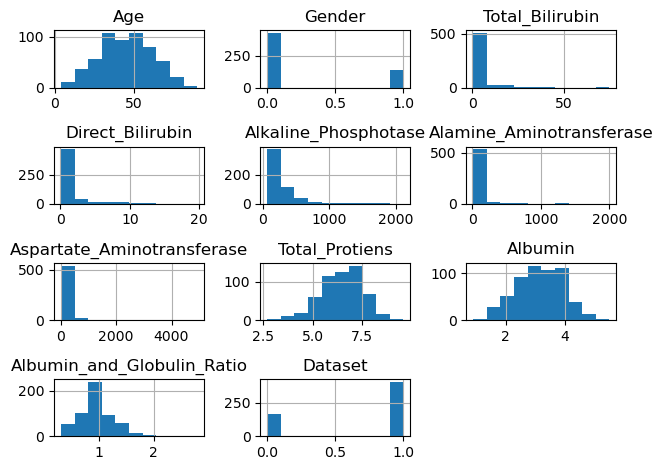

In [28]:
df.hist()
plt.tight_layout()


<Axes: >

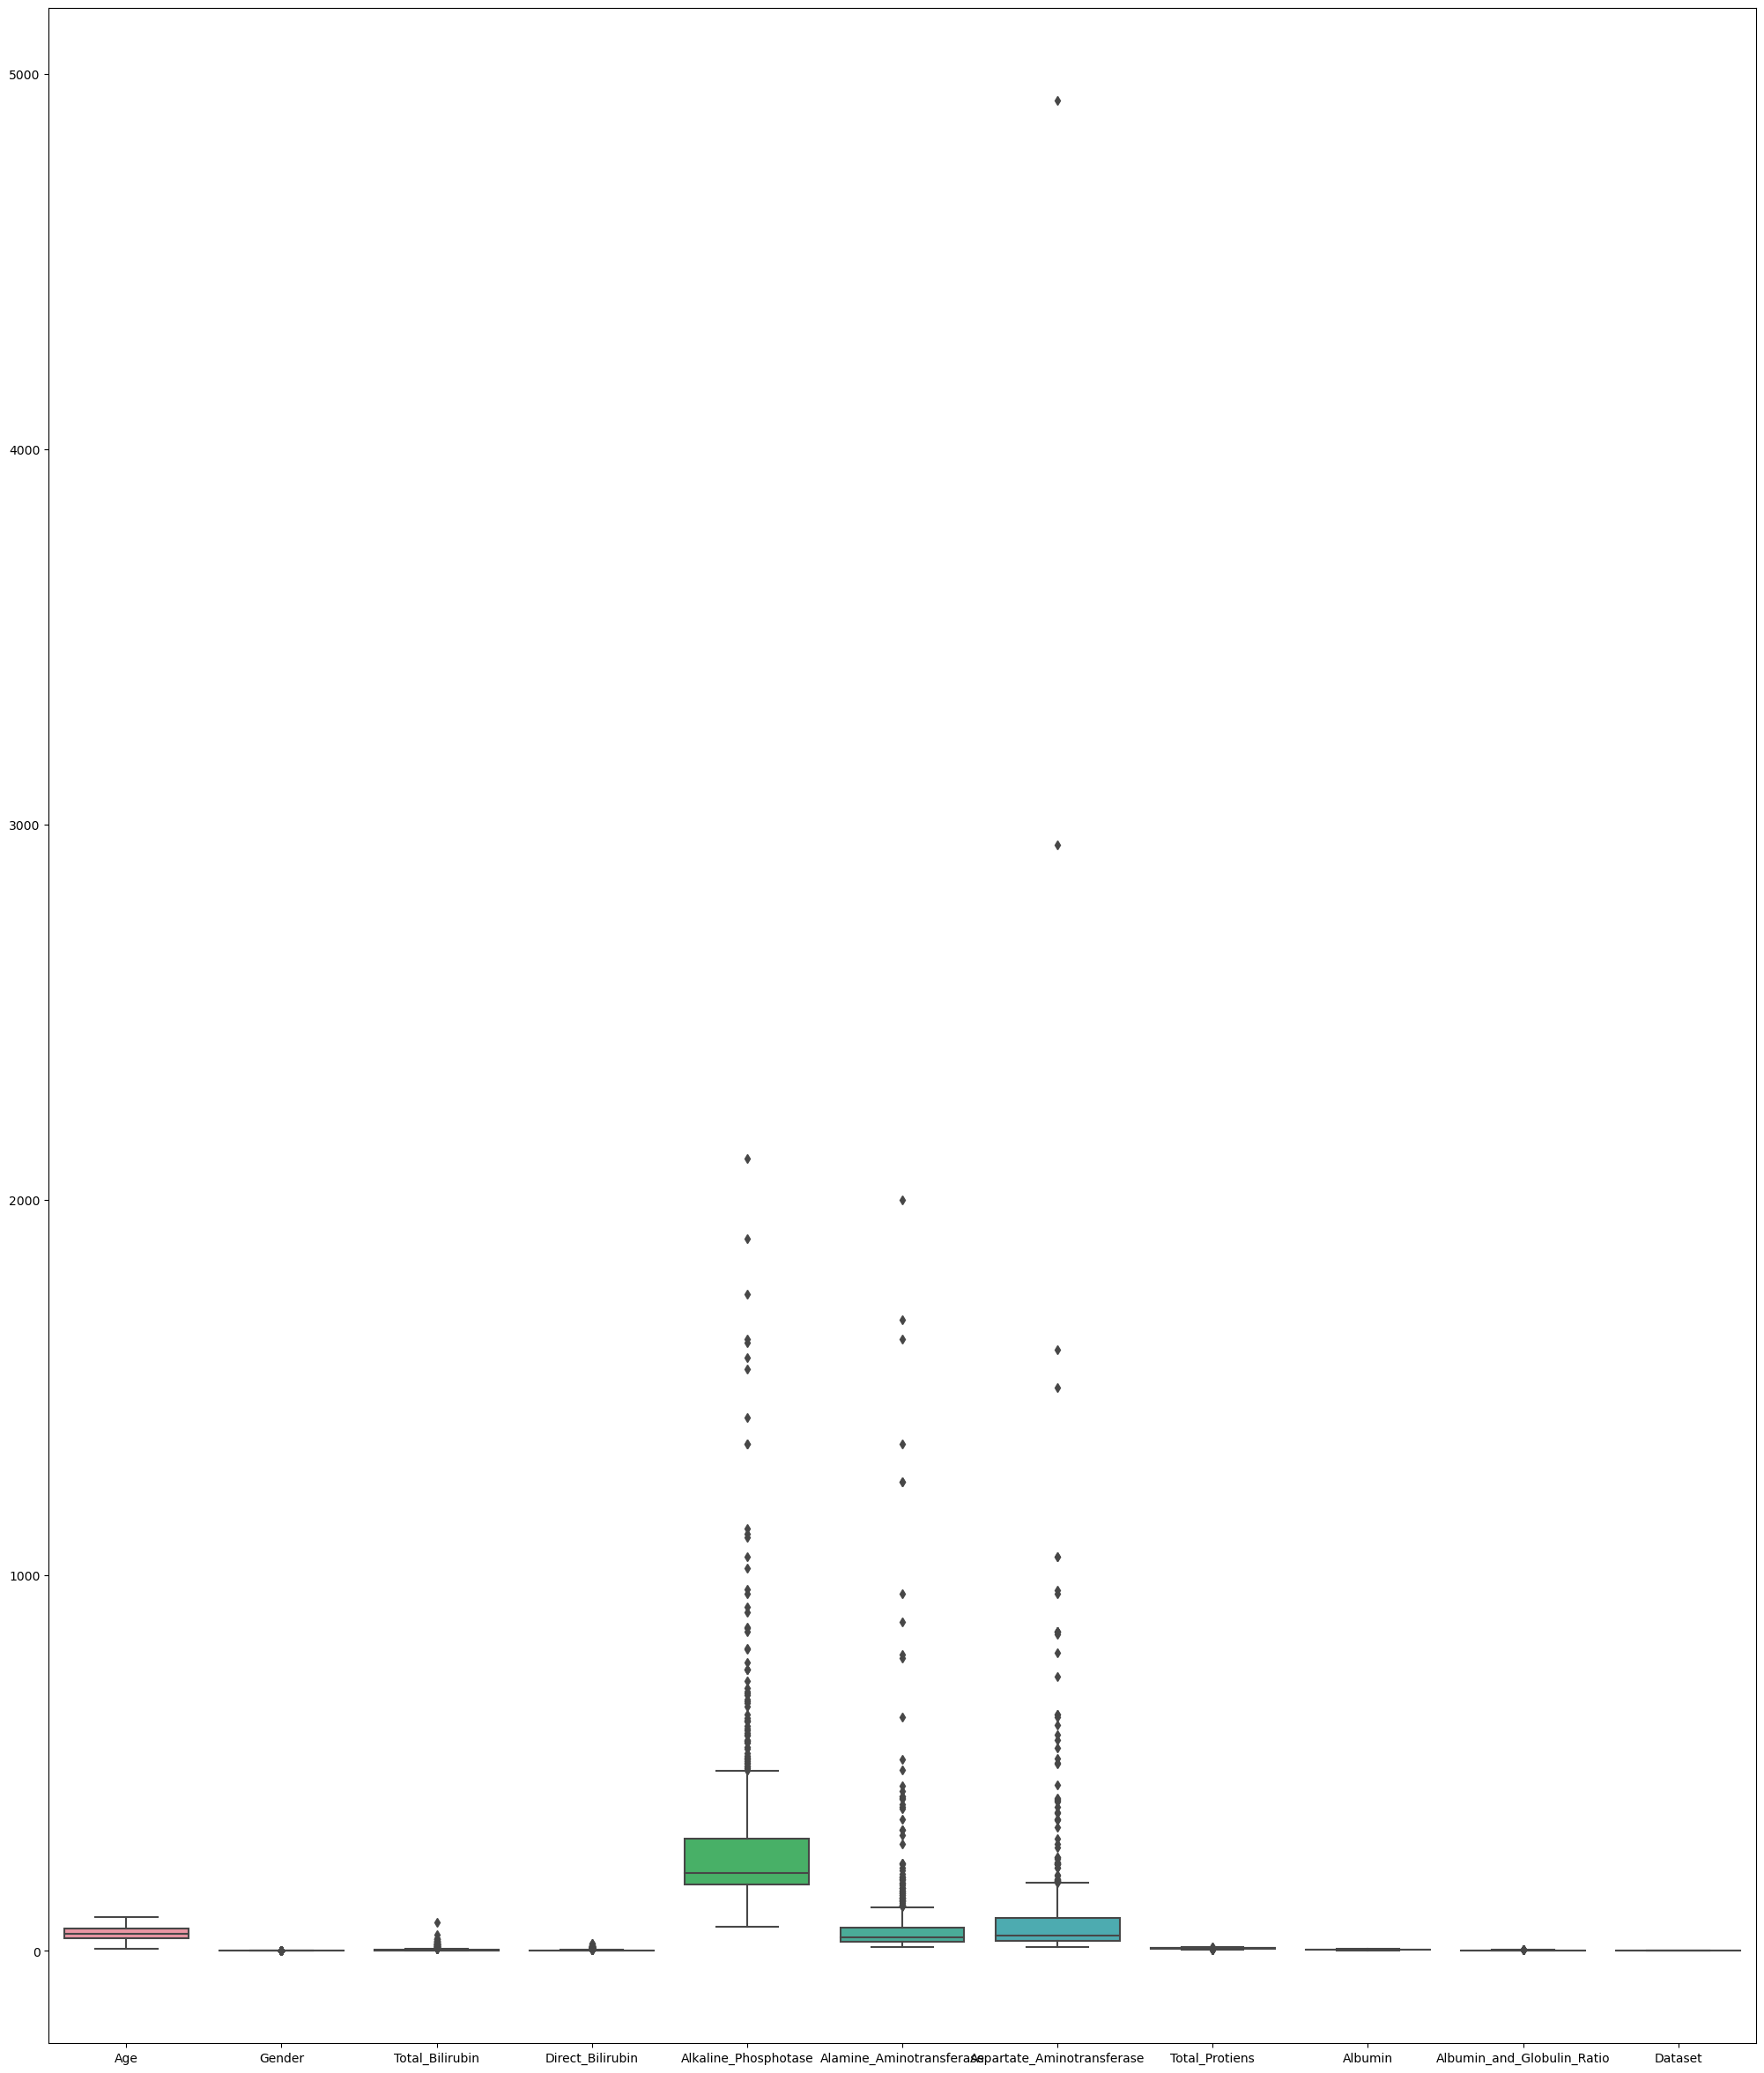

In [29]:
plt.figure(figsize=(25,30))
sns.boxplot(df)

#### Outlier Treatment 

In [30]:
# Outlier detection to calculate the upper_extreme and lower_extreme 
def outlier_detection(data,colname):
    q1=data[colname].quantile(0.25)
    q3=data[colname].quantile(0.75)
    iqr=q3-q1
    
    upper_extreme = q3+(1.5*iqr)
    lower_extreme = q1-(1.5*iqr)
    return lower_extreme, upper_extreme

In [31]:
outlier_detection(df,'Total_Bilirubin')

(-1.9000000000000001, 5.300000000000001)

In [32]:

df[df['Total_Bilirubin']>5.30]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
22,62,0,6.8,3.0,542,116,66,6.4,3.1,0.90,1
27,34,0,6.2,3.0,240,1680,850,7.2,4.0,1.20,1
37,46,1,14.2,7.8,374,38,77,4.3,2.0,0.80,1
...,...,...,...,...,...,...,...,...,...,...,...
572,32,0,15.6,9.5,134,54,125,5.6,4.0,2.50,1
574,32,0,12.1,6.0,515,48,92,6.6,2.4,0.50,1
575,32,0,25.0,13.7,560,41,88,7.9,2.5,2.50,1
576,32,0,15.0,8.2,289,58,80,5.3,2.2,0.70,1


In [33]:
df.loc[df['Total_Bilirubin']>5.30,'Total_Bilirubin']=5.30

In [34]:
df[df['Total_Bilirubin']==5.30]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
1,62,0,5.3,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,5.3,4.1,490,60,68,7.0,3.3,0.89,1
22,62,0,5.3,3.0,542,116,66,6.4,3.1,0.90,1
27,34,0,5.3,3.0,240,1680,850,7.2,4.0,1.20,1
37,46,1,5.3,7.8,374,38,77,4.3,2.0,0.80,1
...,...,...,...,...,...,...,...,...,...,...,...
572,32,0,5.3,9.5,134,54,125,5.6,4.0,2.50,1
574,32,0,5.3,6.0,515,48,92,6.6,2.4,0.50,1
575,32,0,5.3,13.7,560,41,88,7.9,2.5,2.50,1
576,32,0,5.3,8.2,289,58,80,5.3,2.2,0.70,1


In [35]:
outlier_detection(df,'Direct_Bilirubin')

(-1.4500000000000002, 2.95)

In [36]:
df[df['Direct_Bilirubin']>2.95]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
1,62,0,5.3,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,5.3,4.1,490,60,68,7.0,3.3,0.89,1
22,62,0,5.3,3.0,542,116,66,6.4,3.1,0.90,1
27,34,0,5.3,3.0,240,1680,850,7.2,4.0,1.20,1
37,46,1,5.3,7.8,374,38,77,4.3,2.0,0.80,1
...,...,...,...,...,...,...,...,...,...,...,...
572,32,0,5.3,9.5,134,54,125,5.6,4.0,2.50,1
574,32,0,5.3,6.0,515,48,92,6.6,2.4,0.50,1
575,32,0,5.3,13.7,560,41,88,7.9,2.5,2.50,1
576,32,0,5.3,8.2,289,58,80,5.3,2.2,0.70,1


In [37]:
df.loc[df['Direct_Bilirubin']>2.95,'Direct_Bilirubin']=2.95

In [38]:
df[df['Direct_Bilirubin']==2.95]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
1,62,0,5.3,2.95,699,64,100,7.5,3.2,0.74,1
2,62,0,5.3,2.95,490,60,68,7.0,3.3,0.89,1
22,62,0,5.3,2.95,542,116,66,6.4,3.1,0.90,1
27,34,0,5.3,2.95,240,1680,850,7.2,4.0,1.20,1
37,46,1,5.3,2.95,374,38,77,4.3,2.0,0.80,1
...,...,...,...,...,...,...,...,...,...,...,...
572,32,0,5.3,2.95,134,54,125,5.6,4.0,2.50,1
574,32,0,5.3,2.95,515,48,92,6.6,2.4,0.50,1
575,32,0,5.3,2.95,560,41,88,7.9,2.5,2.50,1
576,32,0,5.3,2.95,289,58,80,5.3,2.2,0.70,1


In [39]:
outlier_detection(df,'Alkaline_Phosphotase')

(-7.0, 481.0)

In [40]:
df[df['Alkaline_Phosphotase']>481.0]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
1,62,0,5.3,2.95,699,64,100,7.5,3.2,0.74,1
2,62,0,5.3,2.95,490,60,68,7.0,3.3,0.89,1
20,51,0,2.2,1.00,610,17,28,7.3,2.6,0.55,1
21,51,0,2.9,1.30,482,22,34,7.0,2.4,0.50,1
22,62,0,5.3,2.95,542,116,66,6.4,3.1,0.90,1
...,...,...,...,...,...,...,...,...,...,...,...
549,40,1,2.1,1.00,768,74,141,7.8,4.9,1.60,1
573,32,0,3.7,1.60,612,50,88,6.2,1.9,0.40,1
574,32,0,5.3,2.95,515,48,92,6.6,2.4,0.50,1
575,32,0,5.3,2.95,560,41,88,7.9,2.5,2.50,1


In [41]:
df.loc[df['Alkaline_Phosphotase']>481.0,'Alkaline_Phosphotase']=481.0
df[df['Alkaline_Phosphotase']==481.0]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
1,62,0,5.3,2.95,481,64,100,7.5,3.2,0.74,1
2,62,0,5.3,2.95,481,60,68,7.0,3.3,0.89,1
20,51,0,2.2,1.00,481,17,28,7.3,2.6,0.55,1
21,51,0,2.9,1.30,481,22,34,7.0,2.4,0.50,1
22,62,0,5.3,2.95,481,116,66,6.4,3.1,0.90,1
...,...,...,...,...,...,...,...,...,...,...,...
549,40,1,2.1,1.00,481,74,141,7.8,4.9,1.60,1
573,32,0,3.7,1.60,481,50,88,6.2,1.9,0.40,1
574,32,0,5.3,2.95,481,48,92,6.6,2.4,0.50,1
575,32,0,5.3,2.95,481,41,88,7.9,2.5,2.50,1


In [42]:
outlier_detection(df,'Alamine_Aminotransferase')

(-33.625, 117.375)

In [43]:
df[df['Alamine_Aminotransferase']>117.37]
df.loc[df['Alamine_Aminotransferase']>117.37,'Alamine_Aminotransferase']=117.35
df[df['Alamine_Aminotransferase']==117.37]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset


In [44]:
outlier_detection(df,'Aspartate_Aminotransferase')

(-68.0, 180.0)

In [45]:
df[df['Aspartate_Aminotransferase']>180.0]
df.loc[df['Aspartate_Aminotransferase']>180.0,'Aspartate_Aminotransferase']=180.0
df[df['Aspartate_Aminotransferase']==180.0]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
16,38,0,1.8,0.80,342,117.35,180,7.6,4.4,1.3,1
18,40,1,0.9,0.30,293,117.35,180,6.8,3.1,0.8,1
25,34,0,4.1,2.00,289,117.35,180,5.0,2.7,1.1,1
27,34,0,5.3,2.95,240,117.35,180,7.2,4.0,1.2,1
43,50,0,2.6,1.20,415,117.35,180,6.4,3.2,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
548,42,0,5.3,2.95,214,60.00,180,6.9,2.8,2.8,1
558,51,0,4.0,2.50,275,117.35,180,7.5,4.0,1.1,1
560,66,0,5.3,2.95,356,117.35,180,6.5,2.2,0.4,1
561,66,0,5.3,2.95,315,117.35,180,6.9,2.0,0.4,1


In [46]:
outlier_detection(df,'Total_Protiens')

(3.6999999999999993, 9.3)

In [47]:
df[df['Total_Protiens']>9.3]
df.loc[df['Total_Protiens']>9.3,'Total_Protiens']=9.3
df[df['Total_Protiens']==9.3]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
270,37,0,0.7,0.2,235,96.0,54,9.3,4.9,1.0,1
273,30,0,0.7,0.2,262,15.0,18,9.3,4.7,1.2,1


In [48]:
df[df['Total_Protiens']<3.69]
df.loc[df['Total_Protiens']<3.69,'Total_Protiens']=3.69
df[df['Total_Protiens']==3.69]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
180,75,0,2.8,1.30,250,23.00,29,3.69,0.9,0.5,1
181,75,0,2.9,1.30,218,33.00,37,3.69,1.5,1.0,1
269,26,0,0.6,0.10,110,15.00,20,3.69,1.6,1.3,1
415,70,0,1.3,0.30,481,93.00,40,3.69,2.7,0.7,1
458,26,0,5.3,2.95,140,37.00,19,3.69,0.9,0.3,1
533,46,1,1.4,0.40,298,117.35,180,3.69,1.0,0.3,1


In [49]:
outlier_detection(df,'Albumin_and_Globulin_Ratio')


(0.09999999999999976, 1.7000000000000002)

In [50]:
df[df['Albumin_and_Globulin_Ratio']>1.70]
df.loc[df['Albumin_and_Globulin_Ratio']>1.70,'Albumin_and_Globulin_Ratio']=1.70
df[df['Albumin_and_Globulin_Ratio']==1.70]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
24,63,0,0.9,0.20,194,52.0,45,6.0,3.9,1.7,0
215,66,0,0.6,0.20,100,17.0,148,5.0,3.3,1.7,0
223,50,0,1.1,0.30,175,20.0,19,7.1,4.5,1.7,0
238,35,1,0.9,0.20,190,40.0,35,7.3,4.7,1.7,0
243,28,1,0.9,0.20,316,25.0,23,8.5,5.5,1.7,1
267,43,1,0.9,0.30,140,12.0,29,7.4,3.5,1.7,1
297,25,1,0.9,0.30,159,24.0,25,6.9,4.4,1.7,0
372,48,0,0.7,0.20,326,29.0,17,8.7,5.5,1.7,1
435,17,1,0.5,0.10,206,28.0,21,7.1,4.5,1.7,0
484,62,0,5.0,2.10,103,18.0,40,5.0,2.1,1.7,1


<Axes: >

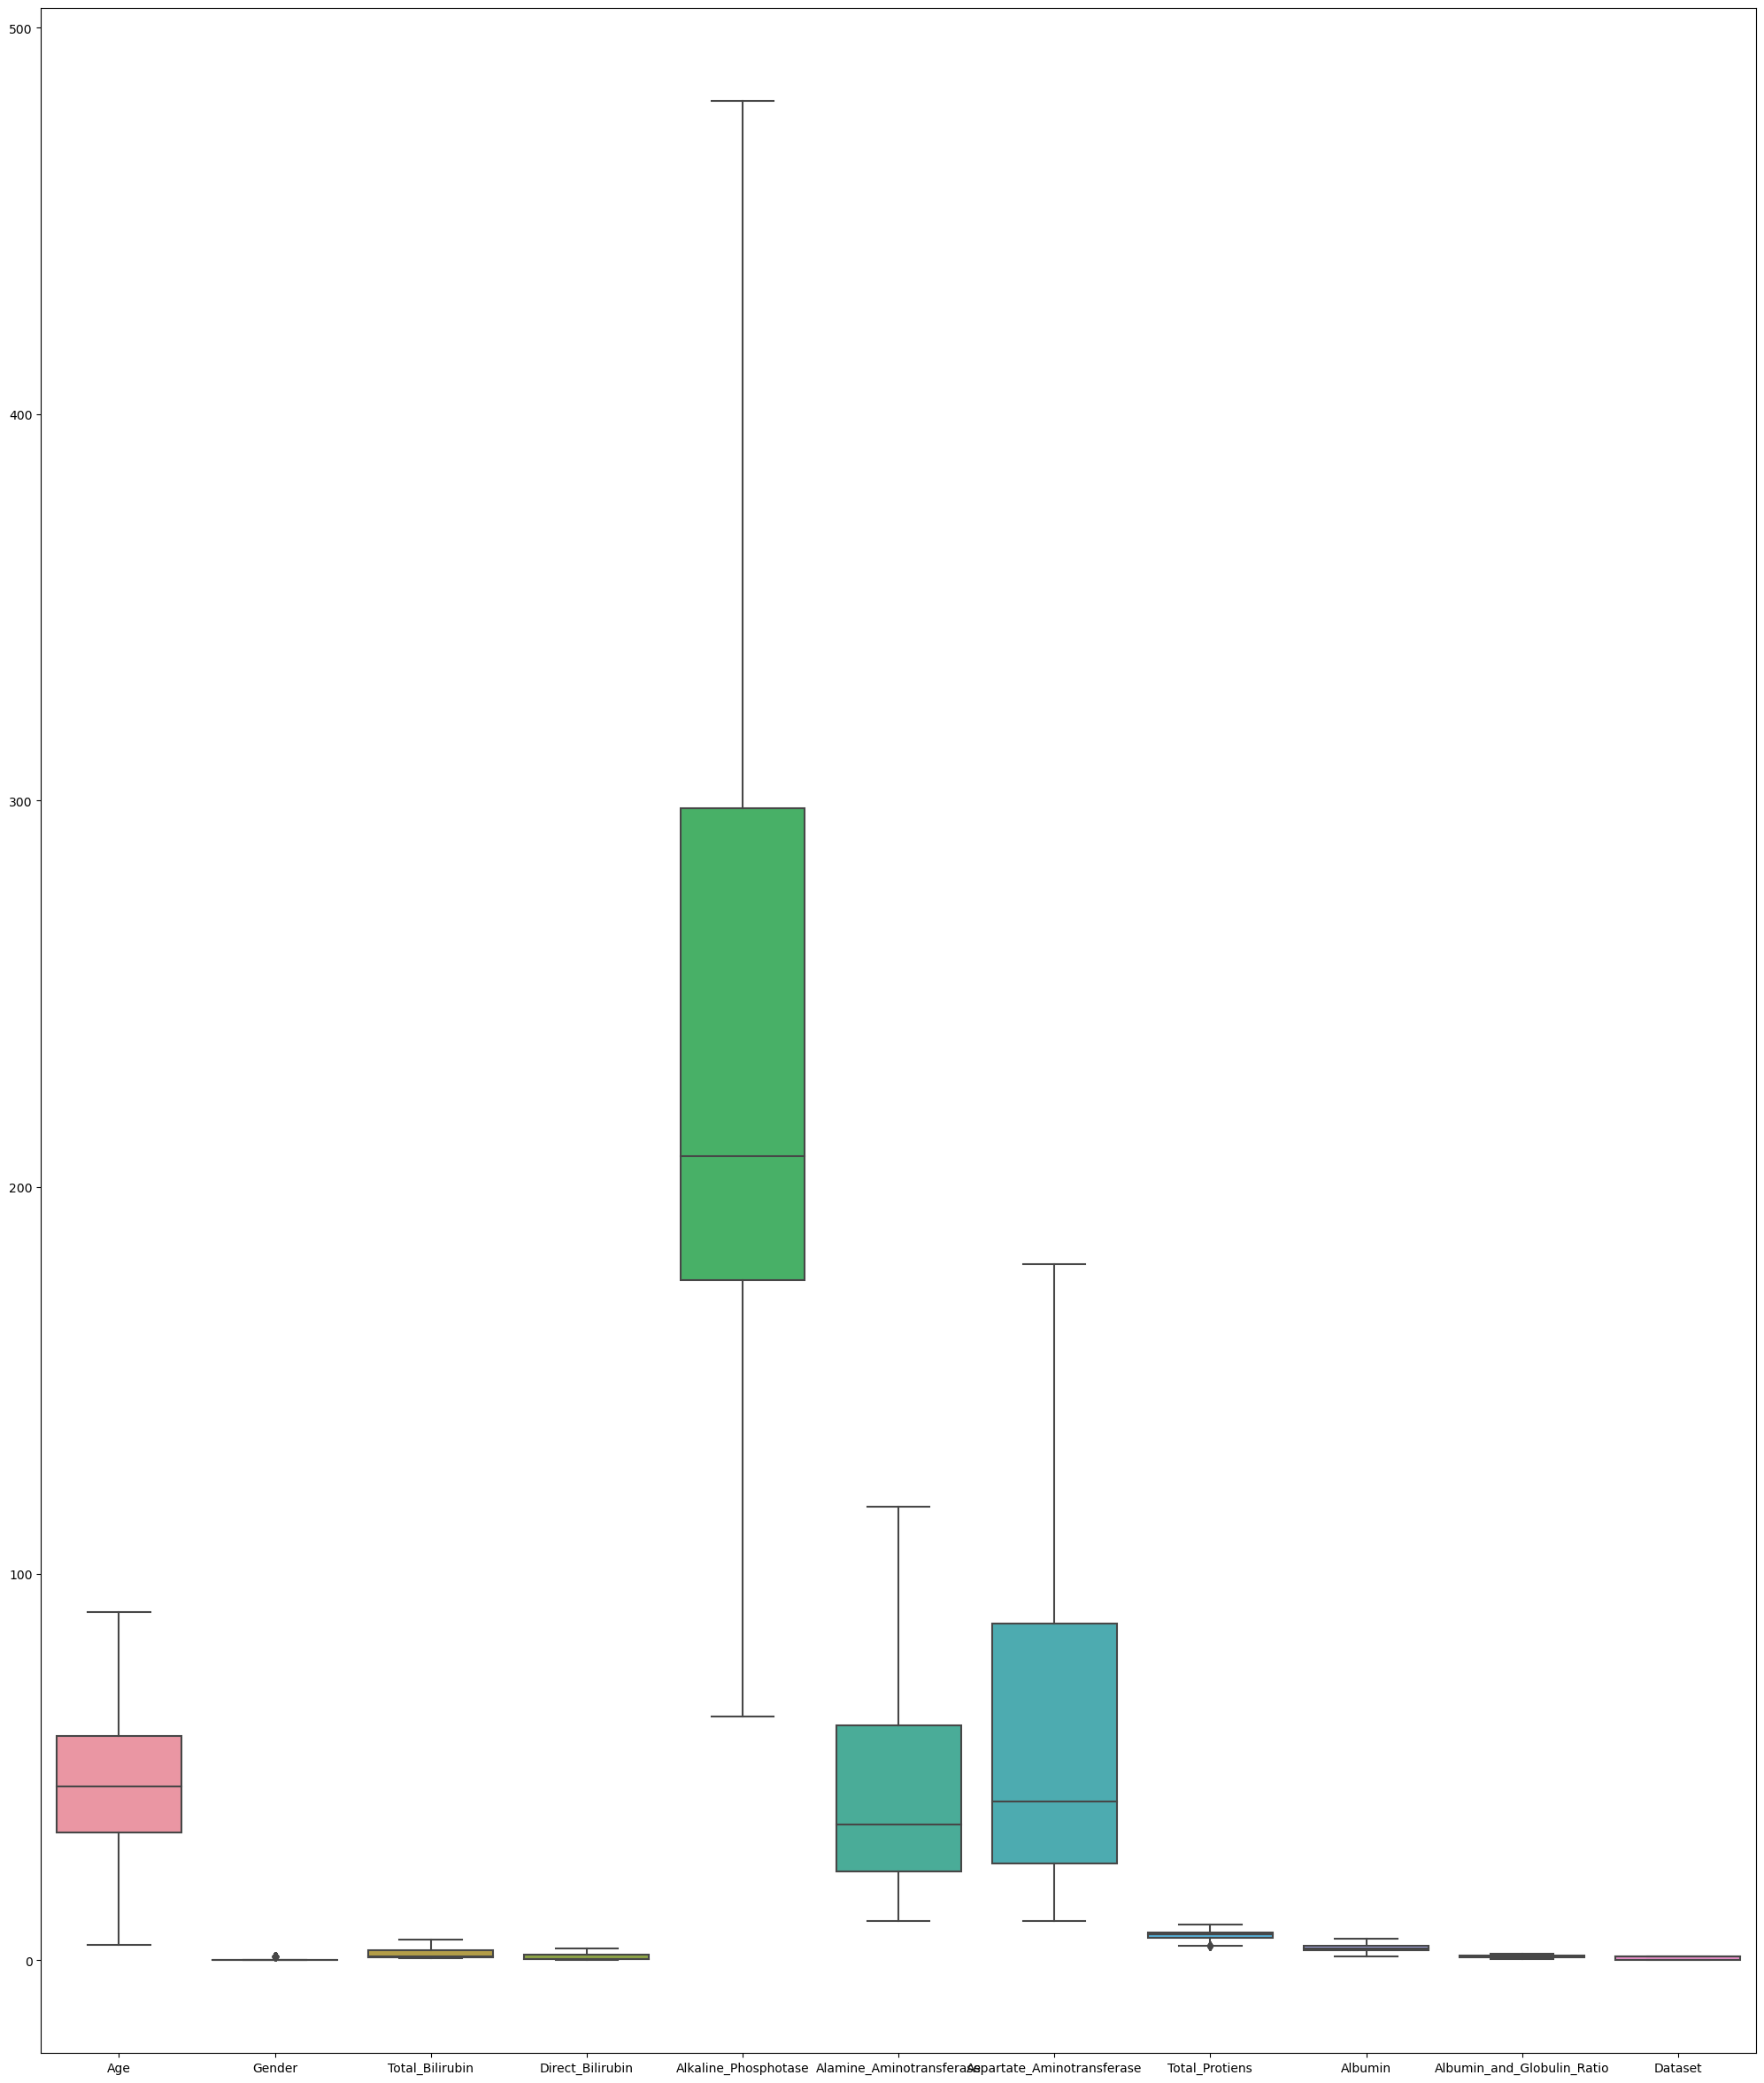

In [51]:
plt.figure(figsize=(25,30))
sns.boxplot(df) 

In [52]:
df.head() 

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,1,0.7,0.10,187,16.0,18,6.8,3.3,0.90,1
1,62,0,5.3,2.95,481,64.0,100,7.5,3.2,0.74,1
2,62,0,5.3,2.95,481,60.0,68,7.0,3.3,0.89,1
3,58,0,1.0,0.40,182,14.0,20,6.8,3.4,1.00,1
4,72,0,3.9,2.00,195,27.0,59,7.3,2.4,0.40,1


In [53]:
# create the seperate object for target variable 
y = df.Dataset

# create the seperate object for input variable 
x = df.drop('Dataset',axis=1)

In [54]:
# Train - Test- Split set 
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

### Correlation 

In [55]:
df.corr() 

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,-0.057542,0.101736,0.096864,0.039236,-0.067626,-0.028356,-0.194954,-0.269448,-0.224427,0.133821
Gender,-0.057542,1.000000,-0.176644,-0.176097,-0.051234,-0.156456,-0.161608,0.091692,0.093208,0.013785,-0.077396
Total_Bilirubin,0.101736,-0.176644,1.000000,0.982642,0.361642,0.444596,0.539638,-0.071035,-0.305567,-0.329661,0.320924
Direct_Bilirubin,0.096864,-0.176097,0.982642,1.000000,0.369546,0.439872,0.538841,-0.054551,-0.294835,-0.331350,0.323142
Alkaline_Phosphotase,0.039236,-0.051234,0.361642,0.369546,1.000000,0.376945,0.300422,0.011418,-0.169872,-0.302284,0.238630
Alamine_Aminotransferase,-0.067626,-0.156456,0.444596,0.439872,0.376945,1.000000,0.782047,0.015608,-0.031587,-0.085288,0.285938
Aspartate_Aminotransferase,-0.028356,-0.161608,0.539638,0.538841,0.300422,0.782047,1.000000,-0.034860,-0.160119,-0.169382,0.296804
Total_Protiens,-0.194954,0.091692,-0.071035,-0.054551,0.011418,0.015608,-0.034860,1.000000,0.784064,0.250103,-0.034585
Albumin,-0.269448,0.093208,-0.305567,-0.294835,-0.169872,-0.031587,-0.160119,0.784064,1.000000,0.736723,-0.165273
Albumin_and_Globulin_Ratio,-0.224427,0.013785,-0.329661,-0.331350,-0.302284,-0.085288,-0.169382,0.250103,0.736723,1.000000,-0.189900


<Axes: >

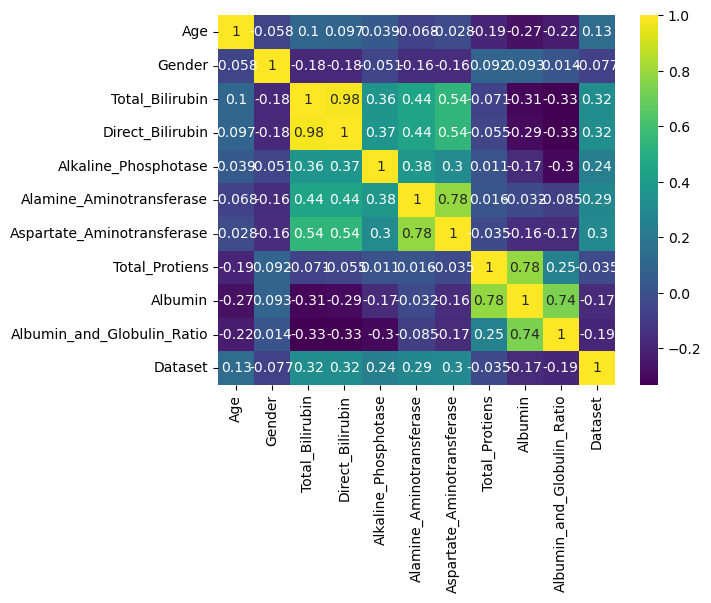

In [56]:
sns.heatmap(df.corr(),cmap='viridis',annot=True) 

### Standardisation 

In [57]:
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler() 
x_train= scaler.fit_transform(x_train)
x_test = scaler.transform(x_test) 

## Machine Learning Model : 

### Model 1 : Logistic Regression 

In [58]:
model  = LogisticRegression()
model.fit(x_train,y_train) 

LogisticRegression()

In [59]:
# predict train set results 
y_train_pred = model.predict(x_train) 

In [60]:
# Predict test set results 
y_pred = model.predict(x_test) 

In [61]:
# get just the prediction for positive class (1) 
y_pred_proba = model.predict_proba(x_test)[:,1]

In [62]:
# Display first 10 prediction 
y_pred_proba[:10]

array([0.98596456, 0.84692699, 0.70483047, 0.43060415, 0.91751121,
       0.98750719, 0.46902054, 0.34213698, 0.77602362, 0.96420955])

In [63]:
# calculate the ROC  curve  from y_test , pred 

fpr , tpr , thresholds = roc_curve(y_test,y_pred_proba) 

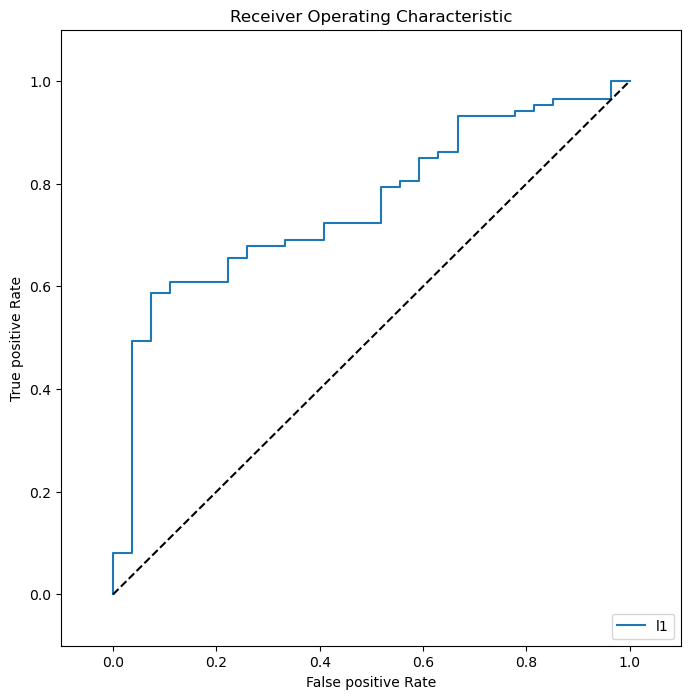

In [64]:
# Plot the ROC curve 

fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# plot curve 
plt.plot(fpr,tpr,label='l1')
plt.legend(loc='lower right')

# Diagonal as 45 degree line 
plt.plot([0,1],[0,1],'k--')

# Diagonal limits and labels 
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True positive Rate')
plt.xlabel('False positive Rate')
plt.show() 

In [65]:
# calculate the AUC for train set 
print(roc_auc_score(y_train,y_train_pred))

0.5929431008295362


In [66]:
## Feature importance 
model = LogisticRegression(C=1, penalty='l2')
model.fit(x_train,y_train) 

LogisticRegression(C=1)

In [67]:
indices = np.argsort(-abs(model.coef_[0,:]))
print('The features in the order of importance are:')
print(50*'-')
for feature in x.columns[indices]:
    print(feature) 

The features in the order of importance are:
--------------------------------------------------
Albumin
Direct_Bilirubin
Total_Protiens
Alamine_Aminotransferase
Albumin_and_Globulin_Ratio
Age
Alkaline_Phosphotase
Aspartate_Aminotransferase
Total_Bilirubin
Gender


In [68]:
# find precision , recall 
from sklearn.metrics import precision_score,recall_score
print('Precision score:',precision_score(y_test,y_pred))
print('Recall Score:',recall_score(y_test,y_pred))
print('Confusion Matrx:',confusion_matrix(y_test,y_pred))

Precision score: 0.7941176470588235
Recall Score: 0.9310344827586207
Confusion Matrx: [[ 6 21]
 [ 6 81]]


In [69]:
print('Accuracy of Logistic Regression :',accuracy_score(y_test,y_pred))

Accuracy of Logistic Regression : 0.7631578947368421


### Model 2 : Random Forest : 

In [70]:
tuned_params = {'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
model = RandomizedSearchCV(RandomForestClassifier(), tuned_params, n_iter=15, scoring = 'roc_auc', n_jobs=-1)
model.fit(x_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=15, n_jobs=-1,
                   param_distributions={'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring='roc_auc')

In [71]:
model.best_estimator_

RandomForestClassifier()

In [72]:
y_train_pred = model.predict(x_train) 

In [73]:
y_pred = model.predict(x_test) 

In [74]:
# get just prediction for positive class (1) 
y_pred_proba  = model.predict_proba(x_test)[:,1]


In [75]:
# Display first 10 prediction 
y_pred_proba[:10]

array([0.92, 0.74, 0.79, 0.66, 0.91, 0.99, 0.52, 0.23, 0.64, 0.97])

In [76]:
confusion_matrix(y_test,y_pred) 

array([[10, 17],
       [ 9, 78]], dtype=int64)

In [77]:
# calculate ROC curve from y_test and pred 
fpr ,tpr ,thresholsd  = roc_curve(y_test,y_pred_proba)

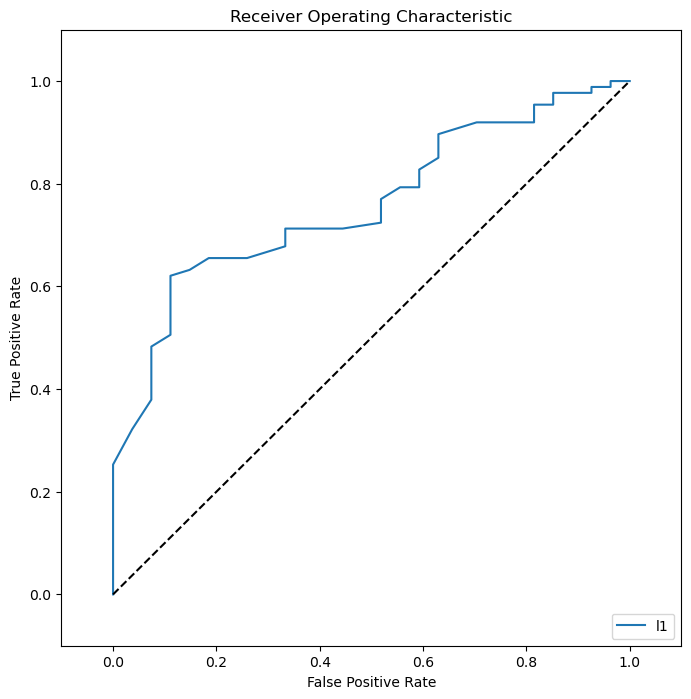

In [78]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [79]:
# calculate AUC for train set 
roc_auc_score(y_train,y_train_pred)

1.0

In [80]:
# Feature Importance 
## Building the model again with the best hyperparameters
model = RandomForestClassifier(n_estimators=500, min_samples_split=2, min_samples_leaf=4)
model.fit(x_train, y_train)

RandomForestClassifier(min_samples_leaf=4, n_estimators=500)

In [81]:
indices = np.argsort(-model.feature_importances_)
print("The features in order of importance are:")
print(50*'-')
for feature in x.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
Alkaline_Phosphotase
Aspartate_Aminotransferase
Alamine_Aminotransferase
Age
Total_Bilirubin
Direct_Bilirubin
Albumin
Total_Protiens
Albumin_and_Globulin_Ratio
Gender


In [82]:
print('Accuracy_score:',accuracy_score(y_test,y_pred))

Accuracy_score: 0.7719298245614035


### Model 3 KNN 

In [83]:
# creating odd list of K for KNN
neighbors = list(range(1,20,2))
# empty list that will hold cv scores
cv_scores = []

#  10-fold cross validation , 9 datapoints will be considered for training and 1 for cross validation (turn by turn) to determine value of k
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())   

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)


The optimal number of neighbors is 3.


In [84]:
MSE.index(min(MSE))

1

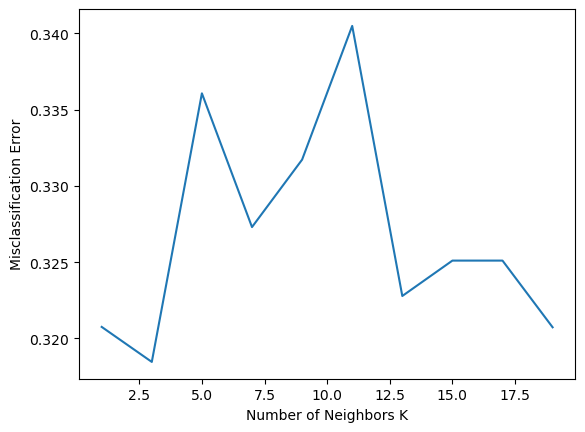

In [85]:
# plot misclassification error vs k 
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [86]:
classifier = KNeighborsClassifier(n_neighbors = optimal_k)
classifier.fit(x_train,y_train) 

KNeighborsClassifier(n_neighbors=3)

In [87]:
y_pred = classifier.predict(x_test) 

In [88]:
y_train_pred = classifier.predict(x_train) 

In [89]:
y_pred_proba = classifier.predict_proba(x_test)[:,1]

In [90]:
# Display first 10 prediction 
y_pred_proba[:10]

array([1.        , 1.        , 1.        , 1.        , 0.66666667,
       1.        , 0.33333333, 0.        , 0.33333333, 1.        ])

In [91]:
# calculate the roc curve from y_test and pred 
fpr,tpr,thresholds = roc_curve(y_test,y_pred_proba) 

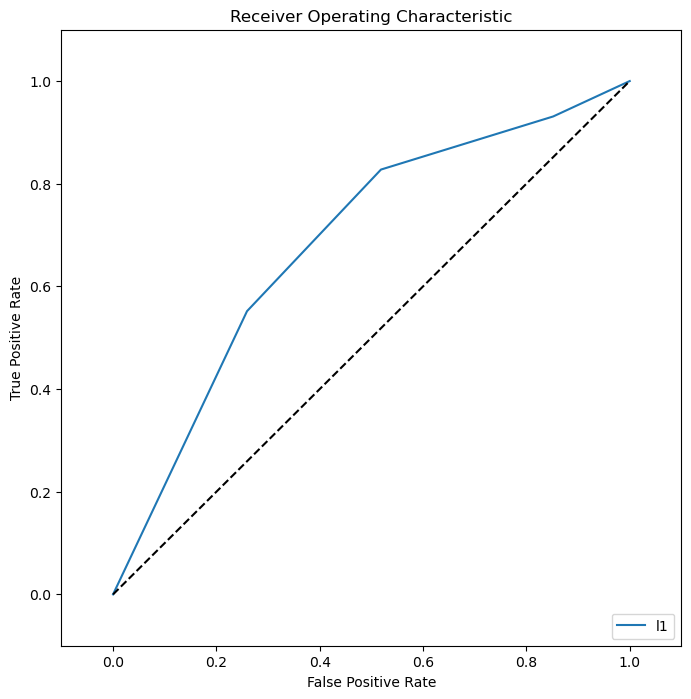

In [92]:
#Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [93]:
# calculate AUC for train 
roc_auc_score(y_train,y_train_pred) 

0.8156443509755812

In [94]:
# calculate the accuracy score :- 
print('Accuracy_score :',accuracy_score(y_test,y_pred))

Accuracy_score : 0.7456140350877193


### Model 4 : Decision Trees 

In [95]:
tuned_params = {'min_samples_split': [2, 3, 4, 5, 7], 'min_samples_leaf': [1, 2, 3, 4, 6], 'max_depth': [2, 3, 4, 5, 6, 7]}
model = RandomizedSearchCV(DecisionTreeClassifier(), tuned_params, n_iter=15, scoring = 'roc_auc', n_jobs=-1)
model.fit(x_train, y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(), n_iter=15, n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7],
                                        'min_samples_leaf': [1, 2, 3, 4, 6],
                                        'min_samples_split': [2, 3, 4, 5, 7]},
                   scoring='roc_auc')

In [96]:
model.best_estimator_ 

DecisionTreeClassifier(max_depth=3, min_samples_split=5)

In [97]:
y_train_pred = model.predict(x_train) 

In [98]:
y_pred = model.predict(x_test) 

In [99]:
y_pred_proba = model.predict_proba(x_test)[:,1]

In [100]:
y_pred_proba[:10]

array([0.97368421, 0.76785714, 0.79166667, 0.42718447, 0.76785714,
       0.97368421, 0.42718447, 0.42718447, 0.60638298, 0.97368421])

In [101]:
confusion_matrix(y_test,y_pred) 

array([[12, 15],
       [17, 70]], dtype=int64)

In [102]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred_proba)

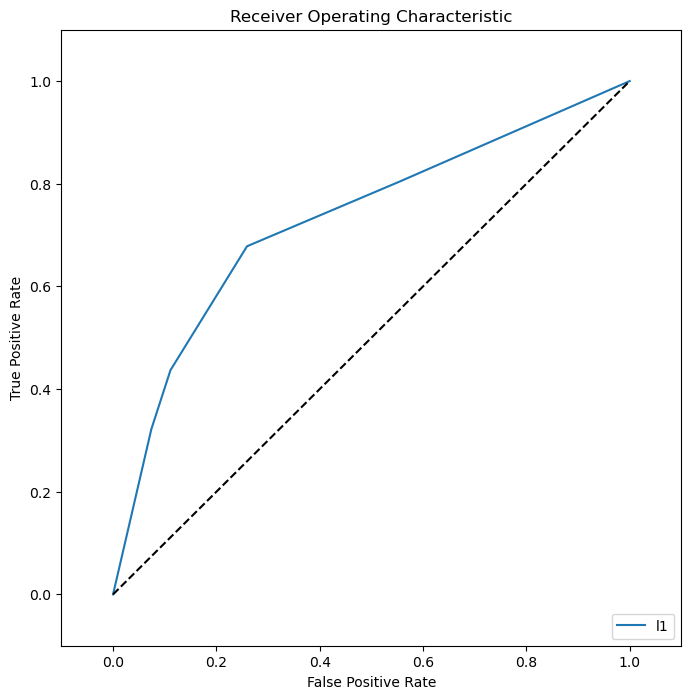

In [103]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [104]:
# calculate the AUC for train : 
roc_auc_score(y_train,y_train_pred) 

0.6676364061222105

In [105]:
# Feature Importance 
## Building the model again with the best hyperparameters
model = DecisionTreeClassifier(min_samples_split=2, min_samples_leaf=6, max_depth=4)
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=6)

In [106]:
indices = np.argsort(-model.feature_importances_)
print("The features in order of importance are:")
print(50*'-')
for feature in x.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
Direct_Bilirubin
Alkaline_Phosphotase
Aspartate_Aminotransferase
Age
Gender
Alamine_Aminotransferase
Albumin_and_Globulin_Ratio
Total_Bilirubin
Total_Protiens
Albumin


In [107]:
print('Accuracy_score:',accuracy_score(y_test,y_pred))

Accuracy_score: 0.7192982456140351


### Model 5 SVC 

In [108]:
from sklearn import svm
def svc_param_selection(x, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(x_train, y_train)
    grid_search.best_params_
    return grid_search.best_params_

In [109]:
svClassifier=SVC(kernel='rbf',probability=True)
svClassifier.fit(x_train,y_train)

SVC(probability=True)

In [110]:
svc_param_selection(x_train,y_train,5) 

{'C': 10, 'gamma': 1}

In [111]:
### Building the model again with the best hyperparameter 
model = SVC(C=1,gamma=1)
model.fit(x_train,y_train) 

SVC(C=1, gamma=1)

In [112]:
# predict the results 
y_train_pred = model.predict(x_train) 

In [113]:
# predict train results 
y_train_pred = model.predict(x_train) 

In [114]:
# predict the results 
y_pred = model.predict(x_test) 

In [115]:
confusion_matrix(y_test,y_pred) 

array([[ 5, 22],
       [ 1, 86]], dtype=int64)

In [116]:
# calculate the ROC curve from y_test and pred 
fpr, tpr,threshold = roc_curve(y_test,y_pred_proba) 

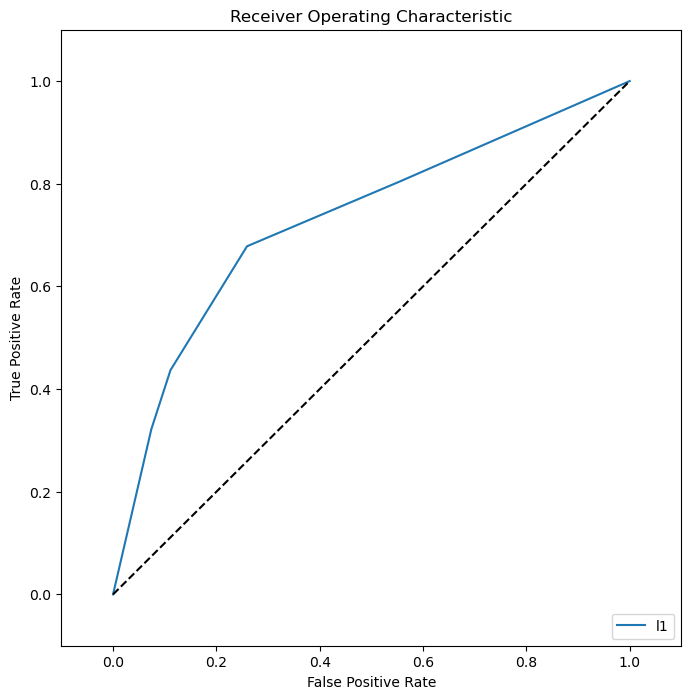

In [117]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [118]:
# calculate the AUC  for train 
roc_auc_score(y_train,y_train_pred) 

0.8730459165790396

In [119]:
print('Accuracy_score:',accuracy_score(y_test,y_pred))

Accuracy_score: 0.7982456140350878


In [120]:
import pickle 

In [125]:
model = RandomForestClassifier(n_estimators=200,max_depth=10,random_state=42)
model.fit(x_train,y_train)

with open('liver_model.pkl','wb') as file:
    pickle.dump(model,file)